# Gradient Descent

This Jupyter Notebook is dedicated to understanding and implementing the gradient descent algorithm.

The following packages are required to run the attached code:

- [Math](https://docs.python.org/3/library/math.html)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

## Description of the Algorithm:

***
Gradient descent is a generic method for optimization that searches for an optimial solution by iteratively moving along a function in search of better solutions. 

Mathematically, gradient descent attempts minimize f(x) for x ∈ ℝ, f(x) differentiable.

With perceptron, we saw that we can train a single neurons by iteratively updating our weights and bias. Gradient descent is one simple yet effective way to train a neural network.

Notably, this algorithm will allow us to find a local minimum, but is not guaranteed to find the global minimum (these can be far different!).
***

## The Algorithm:

***
1. Get a starting point: To begin, we just need a first guess. Ideally this would be "close" to the global minimum, but sometimes we have no idea where that might be. Any x where f(x) exists will work. 

2. Compute the gradient: The gradient, or derivative for first order functions, will tell us the direction of the nearest local minimum. If the tangent line at a point has a positive slope, it means the function is increasing, so we'll want to go to the left to get to a "lower point". If the tangent line at a point is negative, it means it's decreasing as we move to the right, so we will go to the right.

3. Select a step size / learning rate: This is the distance we want to move (after being multiplied by the gradient) at each iteration. A larger step size will have a more drastic move while smaller ones will take a more precise step towards the local minimum. Different functions will have different "best" step sizes, we can make predictions based on the functions, but oftentimes, experimenting with the data will get you to a good result.

4. Select a stop condition: Over infinitely many iterations, gradient descent will get you exactly to the local minimum if you have an appropriate step size, but as the gradient gets closer and closer to 0, we may want to introduce a stopping condition so our code doesn't run forever. This can look like a number of iterations to do descent or a threshold for the gradient or the change in the cost function at each iteration. 

5. Repeat 2-4 taking the initial starting point to now be the previous point - the gradient * step size.
***

## Setting Up:

***
Import the necessary modules.
***

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl
import numpy as np
import seaborn as sns
import math

## Gradient Descent on a Single Variable Function:

***
Perform gradient descent on x^4 -3x^3 + 2x^2. Note that this function has local minima at x = 0 and x = 1.64.
***

In [3]:
# Define the initial function.
def f(x):
    return x**4  - 3 * x**3 + 2 * x**2

# Define its derivative.
def f_prime(x):
    return 4 * x**3 - 9 * x**2 + 4 * x

# Perform gradient descent.
def g_descent(f_prime, alpha = 0.8, w_0 = 5.0, max_iter = 1000):
    W = [w_0]
    i = 0

    #Continue until the max iterations or the gradeint is near 0.
    while abs(f_prime(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*f_prime(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)
    return W[-1], W

l_min, W = g_descent(f_prime, 0.01)
l_min

1.6405275076253054

***
Plot the function.
***

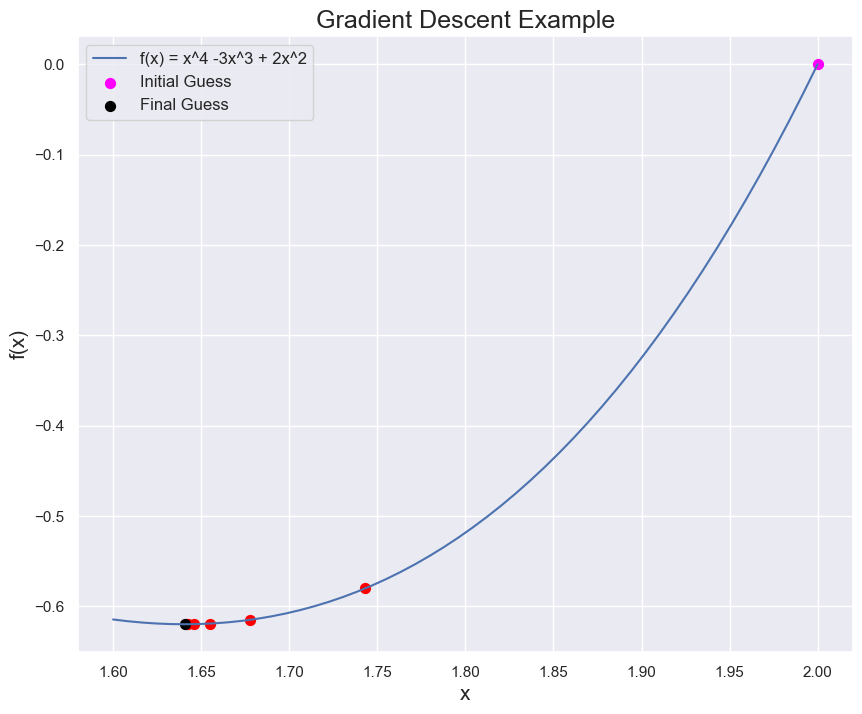

In [4]:
l_min, W = g_descent(f_prime, 0.01, 2)

# Set the theme.
sns.set_theme()

# Define domain variables for the graph.
domain = np.linspace(1.6, 2, 50)

# Plot the function f(x).
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = x^4 -3x^3 + 2x^2")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)

# Plot points.
step = math.floor(len(W)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W[step*i], f(W[step*i]), color = "magenta", s = 50, label = "Initial Guess")
    elif i == 7:
         plt.scatter(W[step*i], f(W[step*i]), color = "black", s = 50, label = "Final Guess")
    else:
        plt.scatter(W[step*i], f(W[step*i]), color = "red", s = 50)


plt.legend(fontsize = 12, loc = "upper left")
plt.title("Gradient Descent Example", fontsize = 18)

plt.show()

***
Note that starting with different initial values can, in fact, change the local minimum found.
***

In [5]:
# Set x values.
x1 = -1
x2 = 1
x3 = 2

# Perform gradient descent at the different initial values. 
g1, W1 = g_descent(f_prime, 0.01, x1)
g2, W2 = g_descent(f_prime, 0.01, x2)
g3, W3 = g_descent(f_prime, 0.01, x3)

# Print the resulting minima.
print(f'Local minimum at x = {round(g1,2)} for x_0 = {x1}')
print(f'Local minimum at x = {round(g2,2)} for x_0 = {x2}')
print(f'Local minimum at x = {round(g3,2)} for x_0 = {x3}')

Local minimum at x = -0.0 for x_0 = -1
Local minimum at x = 1.64 for x_0 = 1
Local minimum at x = 1.64 for x_0 = 2


***
Show the above in a plot.
***

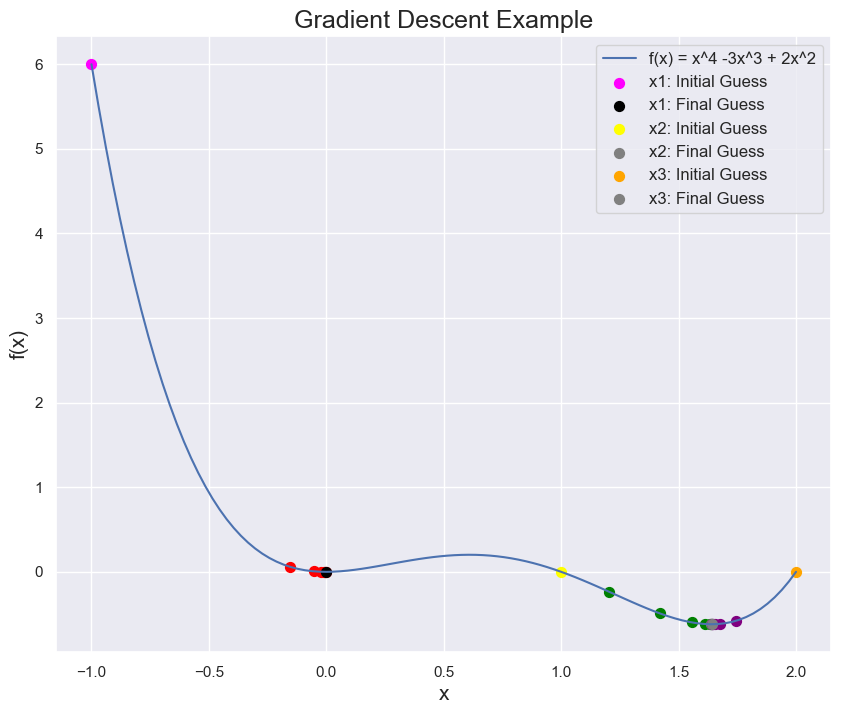

In [6]:
# Set the theme.
sns.set_theme()

# Define domain variables for the graph.
domain = np.linspace(-1, 2, 100)

# Plot the function f(x).
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = x^4 -3x^3 + 2x^2")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)

# Plot points for x1.
step = math.floor(len(W1)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W1[step*i], f(W1[step*i]), color = "magenta", s = 50, label = "x1: Initial Guess")
    elif i == 7:
         plt.scatter(W1[step*i], f(W1[step*i]), color = "black", s = 50, label = "x1: Final Guess")
    else:
        plt.scatter(W1[step*i], f(W1[step*i]), color = "red", s = 50)

# Plot points for x2.
step = math.floor(len(W2)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W2[step*i], f(W2[step*i]), color = "yellow", s = 50, label = "x2: Initial Guess")
    elif i == 7:
         plt.scatter(W2[step*i], f(W2[step*i]), color = "grey", s = 50, label = "x2: Final Guess")
    else:
        plt.scatter(W2[step*i], f(W2[step*i]), color = "green", s = 50)

# Plot points for x3.
step = math.floor(len(W3)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W3[step*i], f(W3[step*i]), color = "orange", s = 50, label = "x3: Initial Guess")
    elif i == 7:
         plt.scatter(W3[step*i], f(W3[step*i]), color = "grey", s = 50, label = "x3: Final Guess")
    else:
        plt.scatter(W3[step*i], f(W3[step*i]), color = "purple", s = 50)


plt.legend(fontsize = 12, loc = "upper right")
plt.title("Gradient Descent Example", fontsize = 18)

plt.show()

***
Note that for a function like this, the default step size, 0.8, is completely unreasonable because we get derivatives with very large magnitudes. It's possible, in a case like this, for it to take a long time for you to get to a local minimum because the steps are huge.
***

## Gradient Descent on a More Complex Function:

***
The algorithm works very similarly for multi-variate functions. Now, we just perform gradient descent induvidually in each new dimension. I use g(x) = (x_0-5)^2 + (x_1+2)^2, which has a local (and global) minimum at (5, -2).
***

In [7]:
# Define the initial function.
def g(x0, x1):
    return (x0-5) ** 2 + (x1 + 2) ** 2

# Calculate its gradient.
def g_prime(w):
    grad = [2*(w[0]-5), 2*(w[1]+2)]
    return np.array(grad)

# Perform gradient descent.
def gradient_descent(g_prime, new_x, alpha = 0.8, max_iter = 1000):
    i = 0
    W = [new_x]
    # Go until the gradient is small or you hit the. max iterations.
    while i < max_iter and np.linalg.norm(g_prime(new_x)) > 0.001:
        new_x = new_x - alpha*g_prime(new_x)
        i += 1
        W.append(new_x)
    return W, W[-1]

W, x_vector = gradient_descent(g_prime, np.array([10.0, -5.0]), alpha = 0.1, max_iter=1000)
print(f'Local minimum at x = {round(x_vector[0],2)}, {round(x_vector[1],2)} for x = 10,-5')


Local minimum at x = 5.0, -2.0 for x = 10,-5


***
Let's plot this to see how it looks.
***

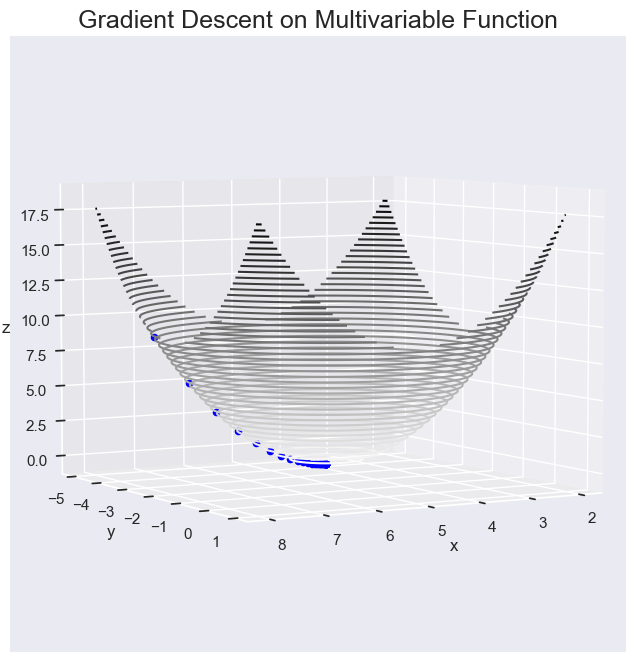

In [36]:
# Define the range of x and y values. 
x = np.linspace(2, 8, 300)
y = np.linspace(-5, 1, 300)

# Compute the values of the function.
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

# Create the 3D plot.
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the points.
for i in range(len(W))[3:len(W)-1]: ax.scatter3D([W[i][0]], [W[i][1]], [g(W[i][0], W[i][1])], color = "blue")

# Set the view. 
ax.view_init(5, 60)

# Set a title. 
plt.title("Gradient Descent on Multivariable Function", fontsize = 18)

plt.show()

## Modified Gradient Descent:

## Conclusions: